In [22]:
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
from ThresholdSelection.threshold_peak_extraction import threshold_peak_extraction, threshold_studentized_residuals, OptimalThreshold

# Prueba con datos de precipitación ASN00021043 (Repositorio Github rminguez)

In [23]:
prec_data = pd.read_csv("Datos/PRCP_ASN00021043.csv")
prec_data

DATE  PRCP
0      1878-01-01   0.0
1      1878-01-02   0.0
2      1878-01-03   0.0
3      1878-01-04   0.0
4      1878-01-05   0.0
...           ...   ...
46127  2012-08-27   8.0
46128  2012-08-28   0.0
46129  2012-08-29   0.0
46130  2012-08-30   0.0
46131  2012-08-31   0.0

[46132 rows x 2 columns]

In [24]:
prec_data['DATE'] = pd.DatetimeIndex(prec_data['DATE'])
prec_data['datenum'] = mdates.date2num(prec_data['DATE'])
min_time_diff = np.min(np.diff(prec_data['datenum']))
min_time_diff

1.0

In [35]:
threshold = 0.0
n0 = 10
min_peak_distance = 2 * min_time_diff   # 2 días de distancia entre picos
siglevel=0.05

data_values = prec_data['PRCP'].values/10
data_values = data_values[~np.isnan(data_values)]
pks_unicos_valid, excedencias_mean_valid, excedencias_weight_valid, pks, locs, autocorrelations = threshold_peak_extraction(data_values, threshold, n0, min_peak_distance)
pks_unicos_valid

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  3. ,  3.1,  3.2,  3.3,  3.4,
        3.5,  3.6,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,
        4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.6,  5.8,  6. ,
        6.1,  6.2,  6.4,  6.5,  6.6,  6.8,  6.9,  7. ,  7.1,  7.2,  7.4,
        7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,
        8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.2, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. , 11.2,
       11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.2, 12.4, 12.6, 12.7,
       12.8, 13. , 13.2, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.2,
       14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.2, 15.4, 15.5, 15.6,
       15.7, 15.8, 16. , 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.8, 17. ,
       17.3, 17.4, 17.5, 17.6, 17.8, 18. , 18.2, 18

In [6]:
autocorrelations

array([[1.00000000e+00, 1.17059320e-02, 4.08579598e-01],
       [2.00000000e+00, 2.22072323e-02, 1.16943839e-01],
       [3.00000000e+00, 2.20296691e-02, 1.19937242e-01],
       [4.00000000e+00, 4.42300502e-02, 1.79041805e-03],
       [5.00000000e+00, 4.92141117e-02, 5.10991278e-04]])

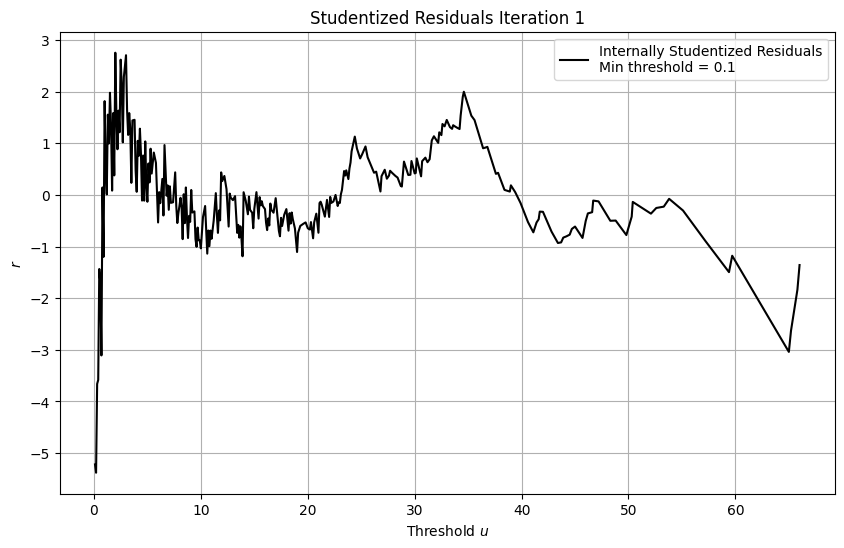

The maximum studentized residual of the first record detects anomalies
Maximum sensitivity = 5.379831092534403 and thus the optimal threshold seems to be on the right side of the minimum sample value, looking for the location


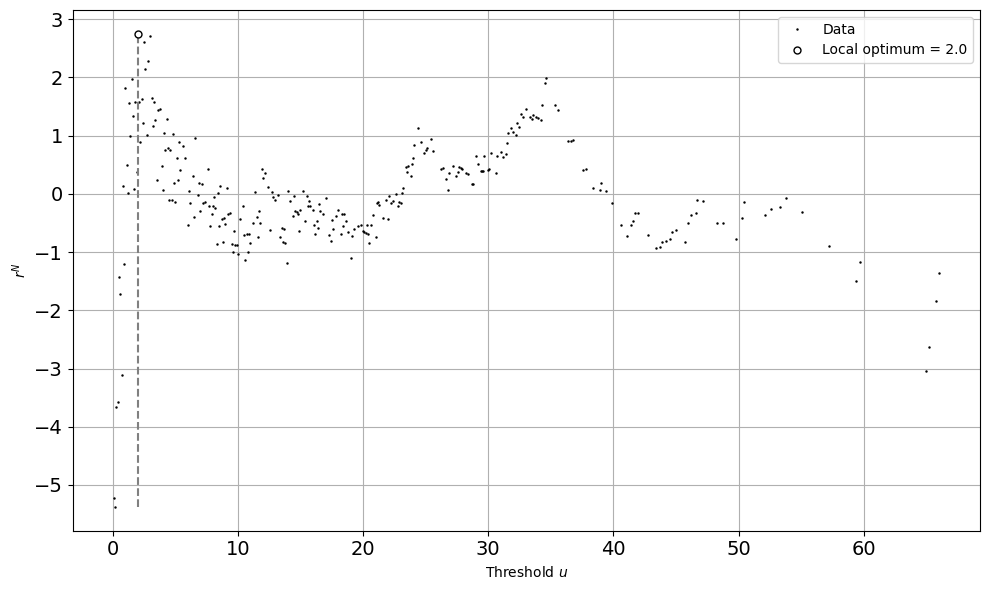

New threshold found: [2.]


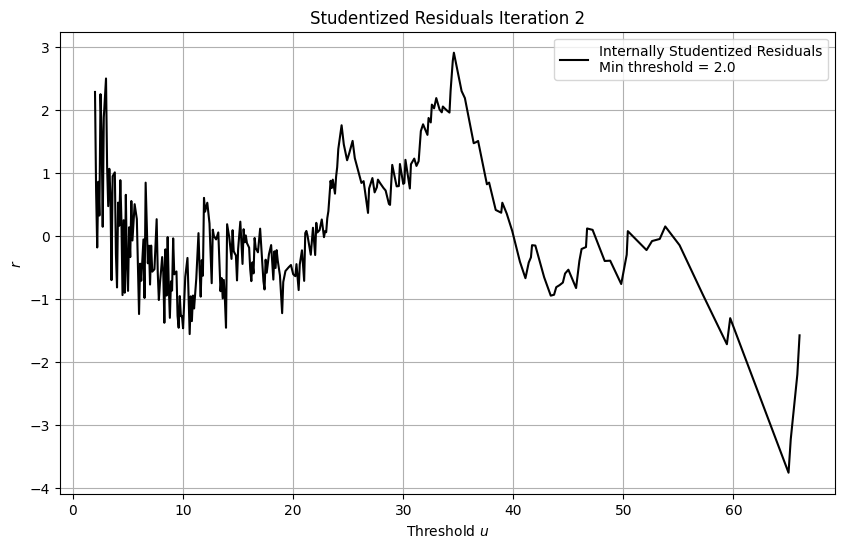

The maximum studentized residual of the first record detects anomalies
Maximum sensitivity = 3.751851513122418 and thus the optimal threshold seems to be on the right side of the minimum sample value, looking for the location


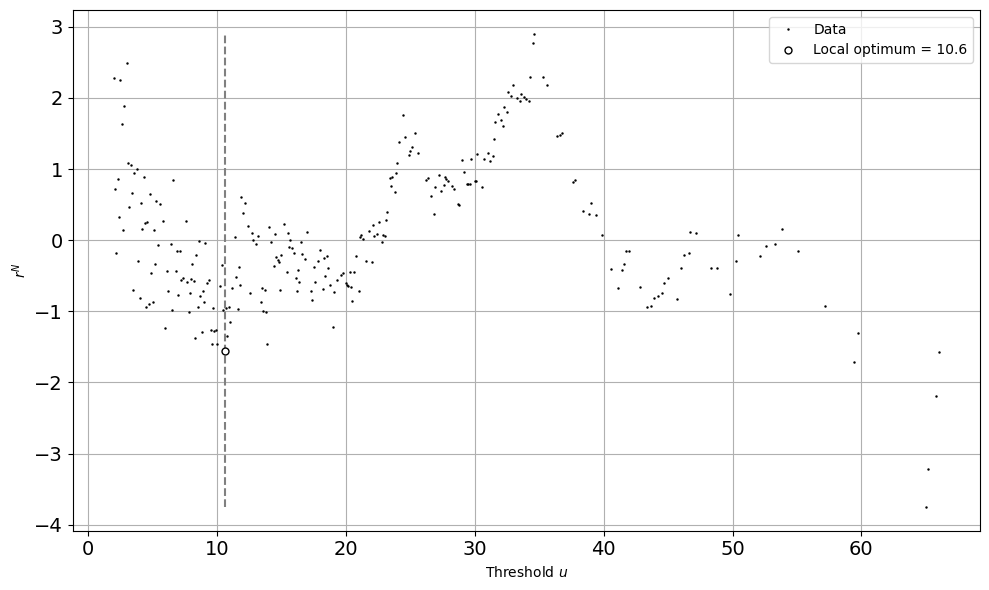

New threshold found: [10.6]


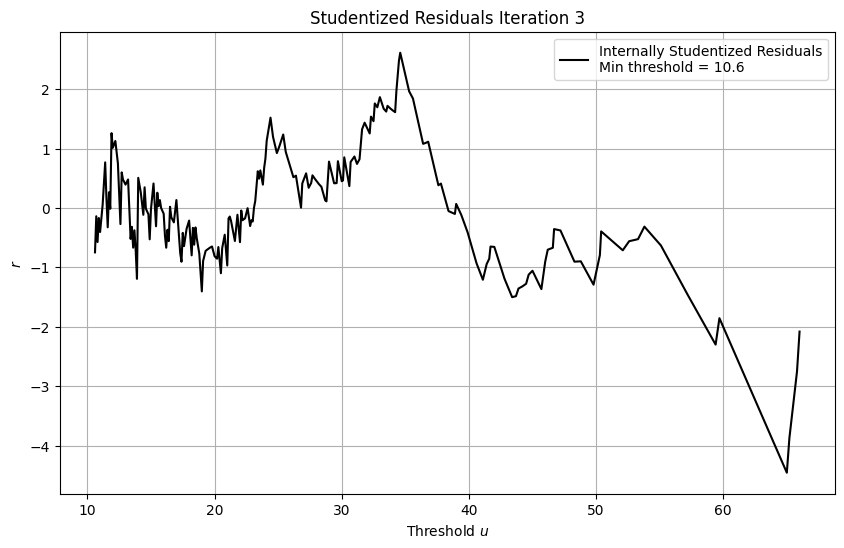

Optimal threshold: [10.6]
Optimal reggression coeffs: [6.46034602 0.26095338]
Optimal obj fun: 41.709458373266486
Optimal Residuals: [-1.26775090e-01 -2.41493621e-02 -9.95313788e-02 -2.98229581e-02
 -7.18411835e-02  9.49397417e-03  1.44117167e-01  2.97682133e-02
 -6.12857883e-02  5.05300833e-02 -2.57787173e-03  2.49816817e-01
  2.02283539e-01  2.29531798e-01  1.54962051e-01 -5.61599864e-02
  1.26717397e-01  1.02113479e-01  8.51388692e-02  1.05972833e-01
 -1.15558769e-01 -7.12929186e-02 -1.50366258e-01 -8.57330153e-02
 -1.63466613e-01 -2.73499597e-01  1.20503596e-01  6.26371560e-02
 -2.80925352e-02  8.60497965e-02 -2.43443906e-03 -1.51338933e-02
 -2.64033652e-02 -1.33297097e-01 -5.53470299e-03  1.08362653e-01
 -8.14425097e-02  6.90501933e-02  8.28234137e-03  3.63568503e-02
 -4.30650073e-04 -2.69043966e-02 -1.30104973e-01 -1.87571426e-01
 -1.04266375e-01 -1.59350769e-01  5.68252208e-03 -4.57851285e-02
 -7.19817978e-02  4.03923873e-02 -2.32053369e-01 -2.78127759e-01
 -1.31143224e-01 -2.01

In [7]:
threshold,beta,fobj,r = threshold_studentized_residuals(pks_unicos_valid,
                                                        excedencias_mean_valid,
                                                        excedencias_weight_valid,
                                                        siglevel,
                                                        filename="Figuras/PruebaOptThreshold/PrecASN00021043",
                                                        plot_flag=True,
                                                        display_flag=True)
print(f"Optimal threshold: {threshold}")
print(f"Optimal reggression coeffs: {beta}")
print(f"Optimal obj fun: {fobj}")
print(f"Optimal Residuals: {r}")

# Con una clase

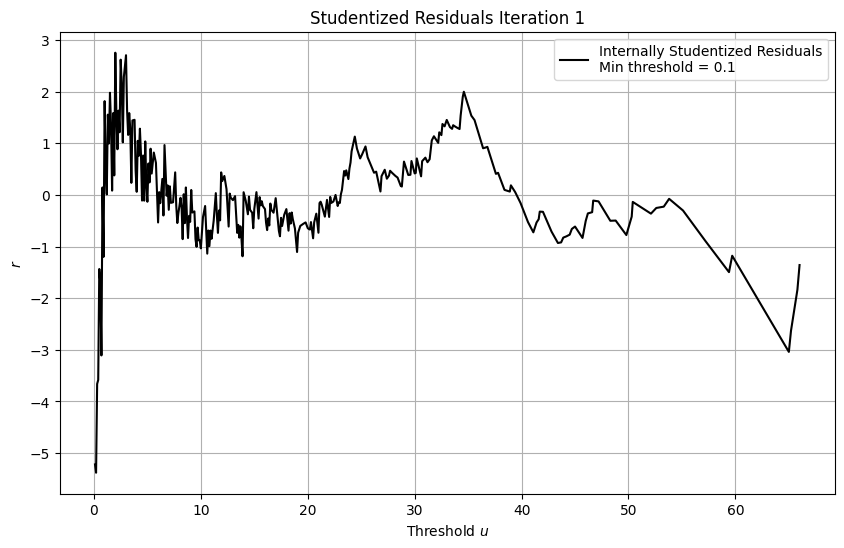

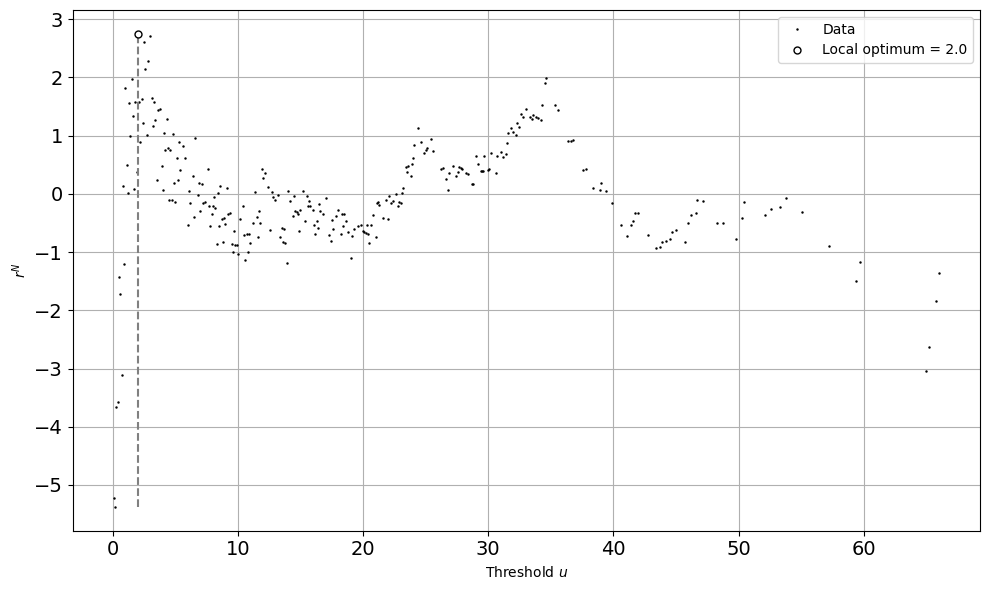

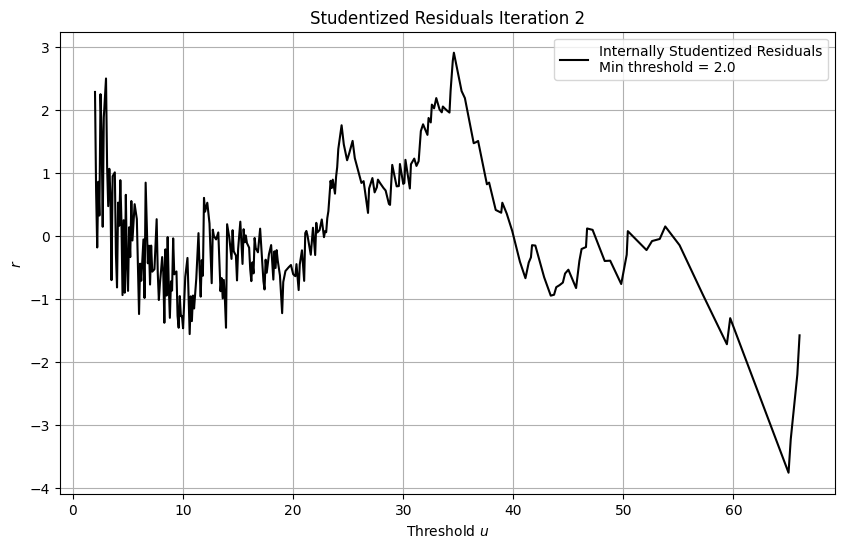

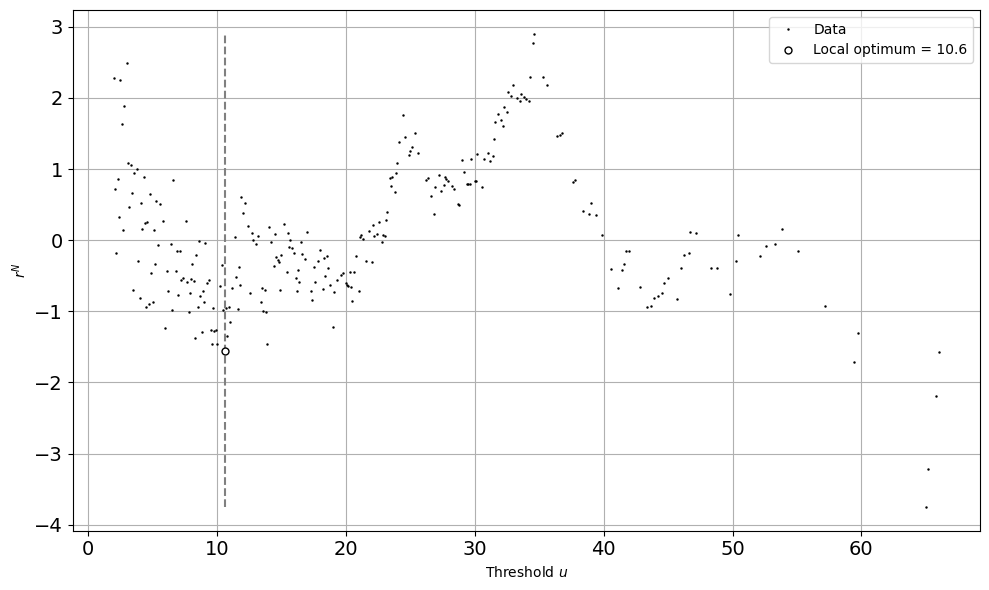

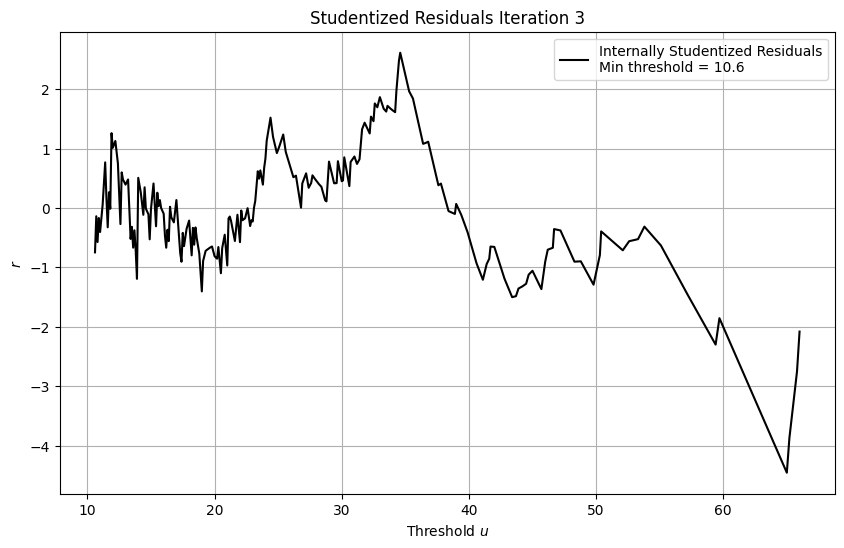

In [11]:
threshold = 0.0
n0 = 10
min_peak_distance = 2 * min_time_diff   # 2 días de distancia entre picos
siglevel=0.05

# Inicializar la clase
opt_thres = OptimalThreshold(data=prec_data['PRCP'].values/10)
# Obtener los picos
opt_thres.threshold_peak_extraction(threshold=0,
                                    n0=n0,
                                    min_peak_distance=min_peak_distance)
# Obtener el threshold óptimo
threshold = opt_thres.threshold_studentized_residuals(siglevel=siglevel,
                                                      plot_flag=True,
                                                      filename=None,
                                                      display_flag=False)

In [16]:
np.unique(opt_thres.data)

array([0.000e+00, 1.000e-01, 2.000e-01, 3.000e-01, 4.000e-01, 5.000e-01,
       6.000e-01, 7.000e-01, 8.000e-01, 9.000e-01, 1.000e+00, 1.100e+00,
       1.200e+00, 1.300e+00, 1.400e+00, 1.500e+00, 1.600e+00, 1.700e+00,
       1.800e+00, 1.900e+00, 2.000e+00, 2.100e+00, 2.200e+00, 2.300e+00,
       2.400e+00, 2.500e+00, 2.600e+00, 2.700e+00, 2.800e+00, 2.900e+00,
       3.000e+00, 3.100e+00, 3.200e+00, 3.300e+00, 3.400e+00, 3.500e+00,
       3.600e+00, 3.800e+00, 3.900e+00, 4.000e+00, 4.100e+00, 4.200e+00,
       4.300e+00, 4.400e+00, 4.500e+00, 4.600e+00, 4.700e+00, 4.800e+00,
       4.900e+00, 5.000e+00, 5.100e+00, 5.200e+00, 5.300e+00, 5.400e+00,
       5.500e+00, 5.600e+00, 5.800e+00, 6.000e+00, 6.100e+00, 6.200e+00,
       6.400e+00, 6.500e+00, 6.600e+00, 6.800e+00, 6.900e+00, 7.000e+00,
       7.100e+00, 7.200e+00, 7.400e+00, 7.600e+00, 7.700e+00, 7.800e+00,
       7.900e+00, 8.000e+00, 8.100e+00, 8.200e+00, 8.300e+00, 8.400e+00,
       8.500e+00, 8.600e+00, 8.700e+00, 8.800e+00, 

In [19]:
data_values = prec_data['PRCP'].values/10
data_values

array([0., 0., 0., ..., 0., 0., 0.])

In [20]:
opt_thres.threshold_peak_extraction(0,10,2)

In [21]:
opt_thres.pks_unicos_valid[opt_thres.pks_unicos_valid > threshold]

array([10.7, 10.8, 10.9, 11. , 11.2, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9,
       12. , 12.2, 12.4, 12.6, 12.7, 12.8, 13. , 13.2, 13.4, 13.5, 13.6,
       13.7, 13.8, 13.9, 14. , 14.2, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9,
       15. , 15.2, 15.4, 15.5, 15.6, 15.7, 15.8, 16. , 16.1, 16.2, 16.3,
       16.4, 16.5, 16.6, 16.8, 17. , 17.3, 17.4, 17.5, 17.6, 17.8, 18. ,
       18.2, 18.3, 18.4, 18.5, 18.6, 18.8, 19. , 19.1, 19.3, 19.6, 19.8,
       20. , 20.1, 20.2, 20.3, 20.4, 20.5, 20.6, 20.8, 21. , 21.1, 21.2,
       21.3, 21.6, 21.8, 22. , 22.1, 22.2, 22.4, 22.6, 22.8, 22.9, 23. ,
       23.1, 23.2, 23.4, 23.5, 23.6, 23.8, 23.9, 24. , 24.1, 24.4, 24.6,
       24.9, 25. , 25.1, 25.4, 25.6, 26.2, 26.4, 26.6, 26.8, 26.9, 27.2,
       27.4, 27.6, 27.7, 27.8, 27.9, 28.2, 28.4, 28.7, 28.8, 29. , 29.2,
       29.4, 29.5, 29.6, 29.7, 30. , 30.1, 30.2, 30.6, 30.7, 31. , 31.2,
       31.4, 31.5, 31.6, 31.8, 32. , 32.2, 32.3, 32.5, 32.6, 32.8, 33. ,
       33.3, 33.5, 33.6, 33.8, 34. , 34.2, 34.3, 34